In [241]:
import pandas as pd
import matplotlib.pyplot as plt

In [242]:
data = pd.DataFrame(pd.read_excel('datasets/clustering.xlsx'))

true = data['Customer Segment'].values
data = data.drop(axis=1, columns=['Customer Segment'])

In [243]:
x = data.values

In [244]:
cluster_count = len(list(set(true)))

In [245]:
from sklearn.preprocessing import LabelEncoder
ENCODER = LabelEncoder()

true = ENCODER.fit_transform(true)

#### K-Means

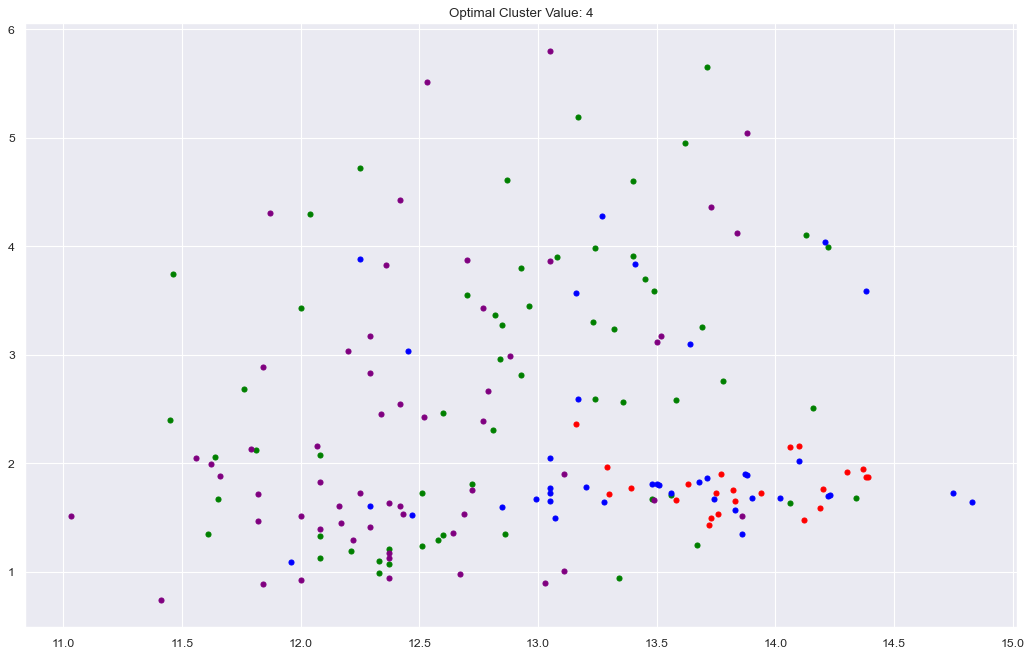

In [246]:
from kneed import KneeLocator
from sklearn.cluster import KMeans

distance = []
K = range(1,25)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(x)
    distance.append(km.inertia_)

colorlist = ['red','green','blue','purple','yellow','black']

kene = KneeLocator(list(K),distance, curve='convex', direction='decreasing', interp_method='interp1d')
breakpoint = kene.knee

km = KMeans(n_clusters = breakpoint, init = "k-means++", random_state = 17)
clusters = km.fit_predict(x)

c = 0
plt.figure(figsize=(16,10),dpi=80)
while c < breakpoint:
    plt.scatter(x[clusters==0+c,0], x[clusters==0+c,1], s=20, c=colorlist[c])
    c += 1
plt.title(f'Optimal Cluster Value: {breakpoint}')
plt.show()

#### Agglomerative Hierarchical

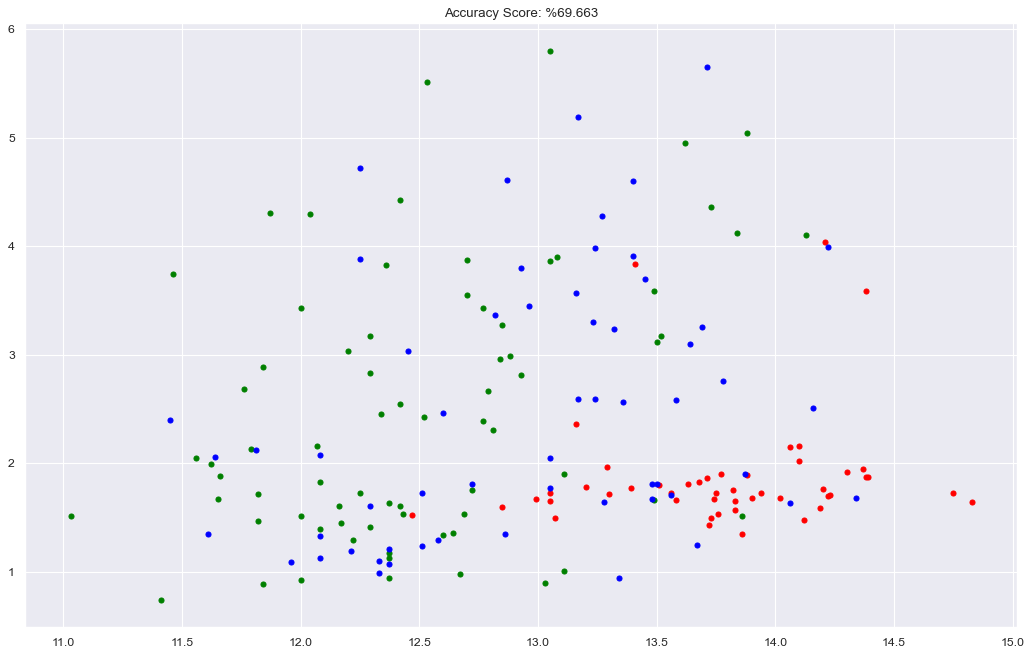

In [247]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score

agg = AgglomerativeClustering(n_clusters = cluster_count, affinity="euclidean", linkage="ward")
clusters = agg.fit_predict(x)

ACC = round(accuracy_score(true,clusters)*100,3)

c = 0
plt.figure(figsize=(16,10),dpi=80)
while c < cluster_count:
    plt.scatter(x[clusters==0+c,0], x[clusters==0+c,1], s=20, c=colorlist[c])
    c += 1
plt.title(f'Accuracy Score: %{ACC}')
plt.show()

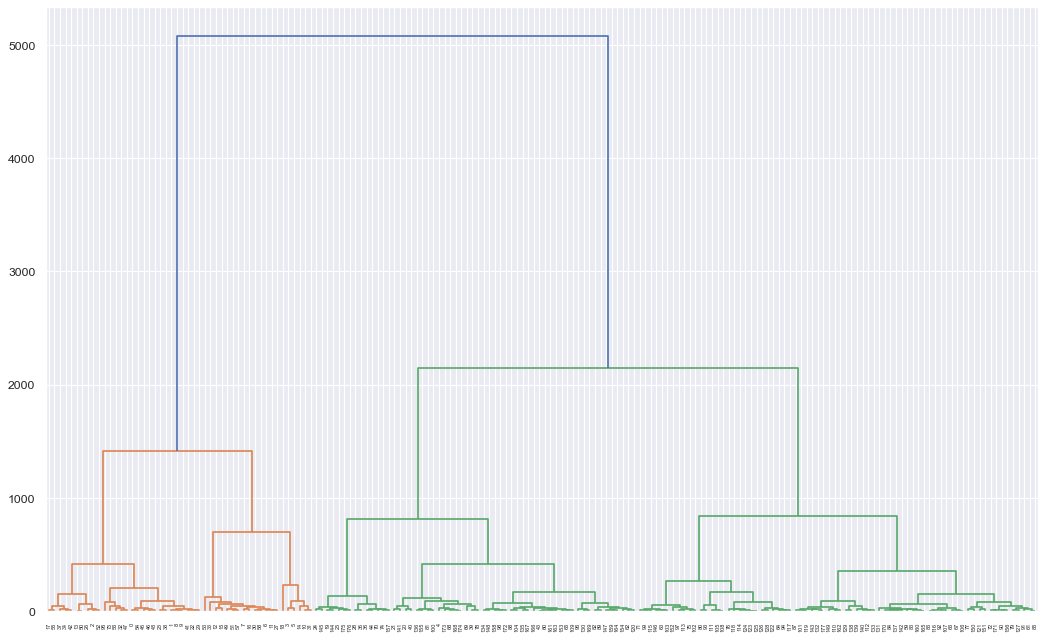

In [248]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(16,10),dpi=80)
dendrogram = sch.dendrogram(sch.linkage(x, method="ward"))
plt.show()